IMPORTING NECESSARY PACKAGES AND MODULES

In [53]:
import pandas as pd
from data_exploration import *
from data_preprocess import *
from evaluation import *
from decision_tree import *

READING THE CSV FILE

In [54]:
df = pd.read_csv("../../../datasets/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


CHECKING NUMBER OF (ROWS,COLUMNS) TO KNOW HOW LARGE IS DATA

In [55]:
view(df)

rows:4898 columns:13


# Data preprocessing and exploration

CHECKING FOR NULL AND MISSING VALUES FOR DATA PREPPROCESSING(NO NULL VALUES)

In [56]:
check_null(df) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
recommend               4898 non-null bool
dtypes: bool(1), float64(11), int64(1)
memory usage: 464.1 KB


CHECKING FOR DATA REDUNDANCY(DUPLICATE ROWS)

In [57]:
dupli_rows(df)

number of duplicate rows:937 


REMOVING DUPLICATE ROWS

In [58]:
remove_dupli(df)
view(df)

rows:3961 columns:13


FREQUENCY OF EACH QUALITY LEVEL TO CHECK FOR DATA IMBALANCE 

In [59]:
data1_df = frequency(df,df.quality,"Quality Level")
data1_df

,Quality Level,Frequency
0,3,20
1,4,153
2,5,1175
3,6,1788
4,7,689
5,8,131
6,9,5


BAR CHART SHOWING QUALITY LEVEL DISTRIBUTION
we observe that most of the wines are with quality level of 6 and the number of samples with quality greater than equal to 7 are comparably less

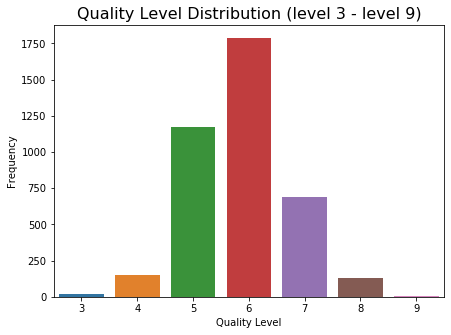

In [60]:
graph(data1_df,"Quality Level","Frequency","Quality Level Distribution (level 3 - level 9)")

plotting to know how the data columns are distributed in the dataset. now the conclusion drawn from below plots about how  different attributes given relate to the target variable quality is as follows:

1-fixed acidity does not give any specification to classify the quality.

2-we see that its quite a downing trend in the volatile acidity as we go higher the quality.

3-Composition of citric acid go higher as we go higher in the quality of the wine.

4-residual sugar is mostly on the lower side for better wines..

5-Composition of chloride also go down as we go higher in the quality of the wine.

6-Composition of free and total sulfur dioxide is moderately same except for quality level 4,usually better wines have low free sulfur dioxide.

7-Sulphates don't have clear differentiating pattern but it is clear that better wines have on an average higher alcohol content.

8-Alcohol level goes higher as te quality of wine increases.

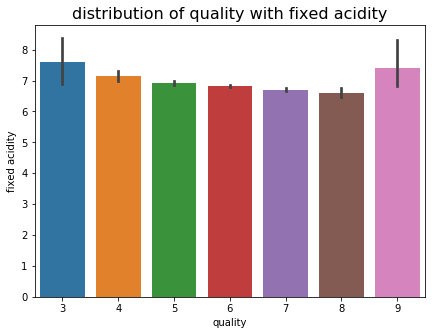

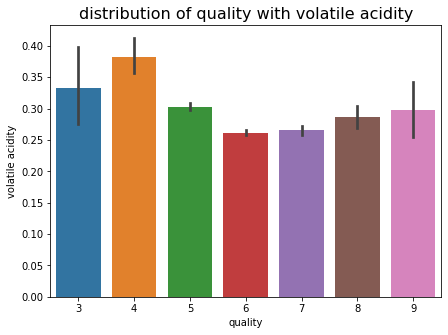

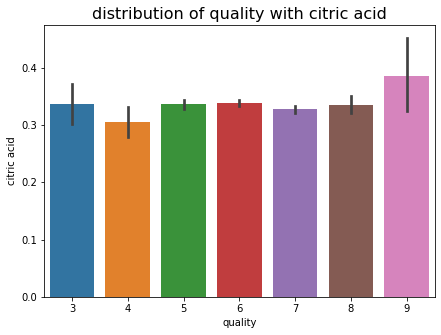

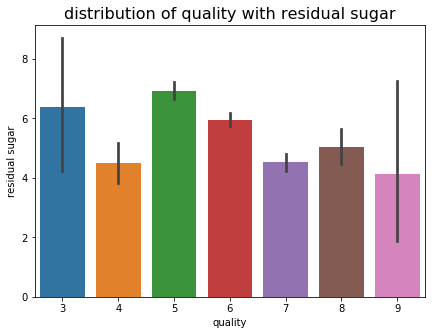

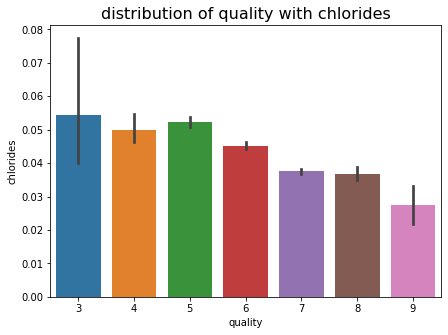

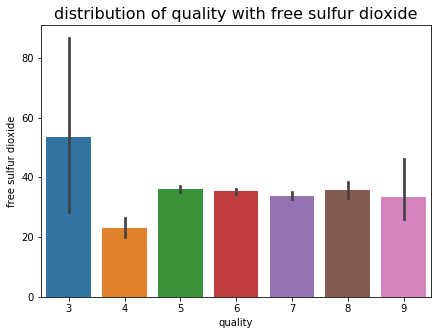

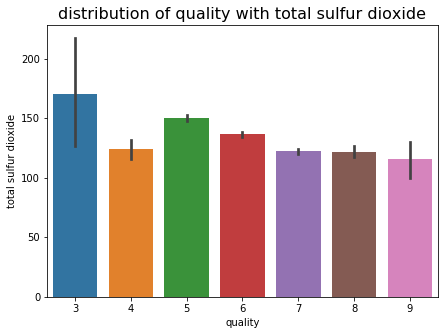

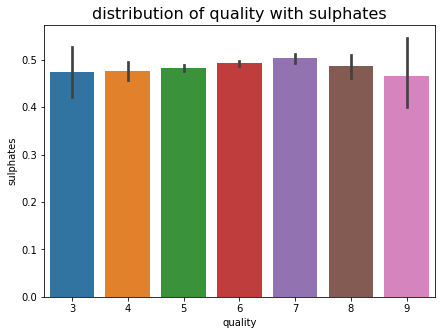

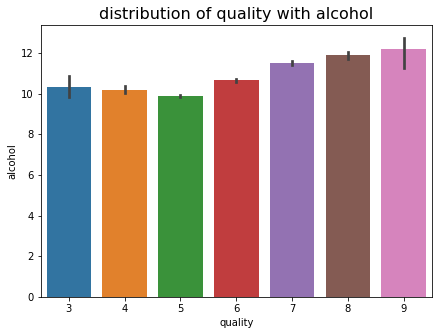

In [61]:
graph(df,"quality","fixed acidity","distribution of quality with fixed acidity")
graph(df,"quality","volatile acidity","distribution of quality with volatile acidity")
graph(df,"quality","citric acid","distribution of quality with citric acid")
graph(df,"quality","residual sugar","distribution of quality with residual sugar")
graph(df,"quality","chlorides","distribution of quality with chlorides")
graph(df,"quality","free sulfur dioxide","distribution of quality with free sulfur dioxide")
graph(df,"quality","total sulfur dioxide","distribution of quality with total sulfur dioxide")
graph(df,"quality","sulphates","distribution of quality with sulphates")
graph(df,"quality","alcohol","distribution of quality with alcohol")


USING CORRELATION COEFF. TO FIND CORRELATION BETWEEN VARIOUS FEATURES WITH TARGET VARIABLE
The dataset has 11 physio-chemical attributes and there are chances that some of them are correlated and also to check how strongly quality is correlated with other variables we will visualise correlation matrix.Correlation summarizes the association between two quantitative variables.it takes values between -1 and +1. A positive valueindicates a positive association, and a negative value indicates a negative association.
The closer the value to 1 the closer the data points fall to a straight line, thus, the linear association is stronger. The closer the value to 0, making the linear association weaker. conclusions are:
 
1-Quality is moderately correlated with alcohol

2-Alcohol is moderately correlated with the pH of wine apart from being moderaltely correlated with quality

3-Density is strongly correlated with residual sugar quantity and moderately correlated with total sulfur dioxide.

4-Free sulfur dioxide and total sulfur dioxide are strongly correlated

In [62]:
correlate_plot(df)

fixed acidity           0.124636
volatile acidity        0.190678
citric acid             0.007065
residual sugar          0.117339
chlorides               0.217739
free sulfur dioxide     0.010507
total sulfur dioxide    0.183356
density                 0.337805
pH                      0.123829
sulphates               0.053200
alcohol                 0.462869
quality                 1.000000
Name: quality, dtype: float64

In [63]:

df1=df.drop("recommend",axis=1)
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.0192137,0.298959,0.08362,0.0240359,-0.0583962,0.0824251,0.266091,-0.431274,-0.0174525,-0.110788,-0.124636
volatile acidity,-0.0192137,1,-0.163228,0.0983397,0.0862868,-0.102471,0.102315,0.0606035,-0.0469535,-0.0211504,0.0468149,-0.190678
citric acid,0.298959,-0.163228,1,0.106269,0.13259,0.0916813,0.122845,0.160076,-0.183015,0.0494422,-0.0765136,0.00706455
residual sugar,0.08362,0.0983397,0.106269,1,0.0760911,0.306835,0.409583,0.820498,-0.165997,-0.0205029,-0.398167,-0.117339
chlorides,0.0240359,0.0862868,0.13259,0.0760911,1,0.101272,0.191145,0.253088,-0.0905727,0.0178707,-0.356928,-0.217739
free sulfur dioxide,-0.0583962,-0.102471,0.0916813,0.306835,0.101272,1,0.619437,0.294638,-0.00774963,0.0379317,-0.251768,0.0105067
total sulfur dioxide,0.0824251,0.102315,0.122845,0.409583,0.191145,0.619437,1,0.536868,0.00823936,0.136544,-0.446643,-0.183356
density,0.266091,0.0606035,0.160076,0.820498,0.253088,0.294638,0.536868,1,-0.0637342,0.0820485,-0.760162,-0.337805
pH,-0.431274,-0.0469535,-0.183015,-0.165997,-0.0905727,-0.00774963,0.00823936,-0.0637342,1,0.142353,0.0930954,0.123829
sulphates,-0.0174525,-0.0211504,0.0494422,-0.0205029,0.0178707,0.0379317,0.136544,0.0820485,0.142353,1,-0.0228499,0.0532004


# data exploration and preprocessing for binary classification

FREQUENCY OF EACH QUALITY LABEL (recommend-target variable for binary classification)

In [64]:
data2_df = frequency(df,df.recommend,'Quality Label')
data2_df

,Quality Label,Frequency
0,False,3136
1,True,825


BAR CHART SHOWING QUALITY LABEL DISTRIBUTION

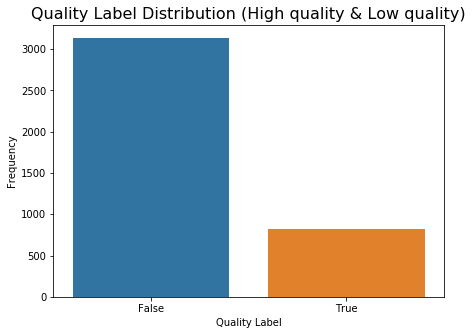

In [65]:
graph(data2_df,"Quality Label","Frequency","Quality Label Distribution (High quality & Low quality)")

PREPROCESSING RECOMMEND ATTRIBUTE (TRUE-1,FALSE-0) CHANGING TO NUMERICAL FROM CATEGORICAL 

In [66]:
process_binary(df)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


# modelling for binary classification
initally the parameters are choosen randomly.
max-depth(the length of the longest path from the tree root to a leaf) is 5.
minimum sample leaf(minimum number of samples required to be at a leaf node) is 2.

features-LIST WITH DEPENDENT VARIABLES 
target1-target variable for binary classification
target2-target variable for multi-class classification

In [67]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']
target1 = ['recommend']
target2 = ['level']



SPLITTING IN TRANING AND TESTING SET(20%-testing set)
we apply that model on new unseen data, called Test Data, and measure the performance. thus we can be sure that our model is stable or not over fitted on training data. But since we won’t have access to new wine data, we’ll split our dataset into training and testing data on a 80:20 ratio that is considered as most ideal split.

In [68]:
x = df[features]
y1 = df[target1].values.ravel()
X_train, X_test, y_train, y_test = data_split(x,y1,0.20)

decision tree classification using gini index criteria for feature importance selection and its evaluation
result obtained are:
1- 622 out of 793 samples are correctly classified.
2- 561 samples are recommended.
3- 61 sample are not recommended.
4- 57 samples that were not recommended(false) are classfied as true.
5- 114 samples that were recommended(true) are classified as false.


In [69]:
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train,5,2)
print( "Accuracy of decision tree using gini index(binary classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using gini index(binary classification) is:  78.43631778058008

classification report:               precision    recall  f1-score   support

       False       0.83      0.91      0.87       618
        True       0.52      0.35      0.42       175

    accuracy                           0.78       793
   macro avg       0.67      0.63      0.64       793
weighted avg       0.76      0.78      0.77       793


confusion matrix: [[561  57]
 [114  61]]


AUC-AREA UNDER THE ROC CURVE
AUC of 0.5 suggests no discrimination
0.7 to 0.8 is considered acceptable
0.8 to 0.9 is considered excellent
and more than 0.9 is considered outstanding

ROC CURVE -RECEIVER OPERATING CHARACTERISTICS CURVE
It llustrates the diagnostic ability of a binary classifier system

results obtained are:
1- accuracy under the curve is 62.816%.
2- the AUC score is 0.78 so the classification with gini criteria is acceptable but not very great.


Area Under the Receiver Operating Characteristics: 0.6281692094313454


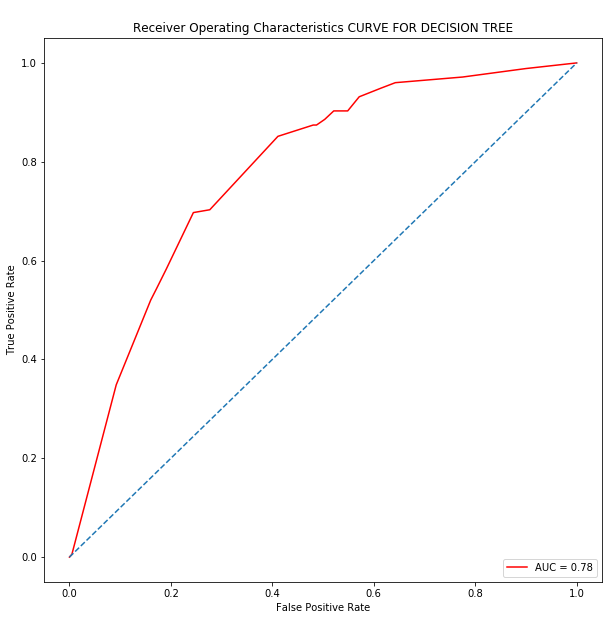

In [70]:
auc_roc,roc_auc,false_positive_rate, true_positive_rate = curve(y_test,y_pred,y_prob)
print("\nArea Under the Receiver Operating Characteristics:",auc_roc)
curve_plot("\nReceiver Operating Characteristics CURVE FOR DECISION TREE" ,roc_auc,false_positive_rate, true_positive_rate)

decision tree classification using entropy criteria for feature importance selection and its evaluation
result obtained are:
1- 633 out of 793 samples are correctly classified.
2- 575  samples are recommended.
3- 58 sample are not recommended.
4- 43 samples that were not recommended(false) are classfied as true.
5- 117 samples that were recommended(true) are classified as false.



In [71]:
y_pred,y_prob = tree_model_entropy(X_test,X_train,y_train,5,2)
print( "Accuracy of decision tree using entropy(binary classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using entropy(binary classification) is:  79.8234552332913

classification report:               precision    recall  f1-score   support

       False       0.83      0.93      0.88       618
        True       0.57      0.33      0.42       175

    accuracy                           0.80       793
   macro avg       0.70      0.63      0.65       793
weighted avg       0.77      0.80      0.78       793


confusion matrix: [[575  43]
 [117  58]]


AUC-AREA UNDER THE ROC CURVE
AUC of 0.5 suggests no discrimination
0.7 to 0.8 is considered acceptable
0.8 to 0.9 is considered excellent
and more than 0.9 is considered outstanding

ROC CURVE -RECEIVER OPERATING CHARACTERISTICS CURVE
It llustrates the diagnostic ability of a binary classifier system

results obtained are:
1- accuracy under the curve is 63.092%.
2- the AUC score is 0.81 so the classification with entropy criteria is great.


Area Under the Receiver Operating Characteristics: 0.6309246417013408


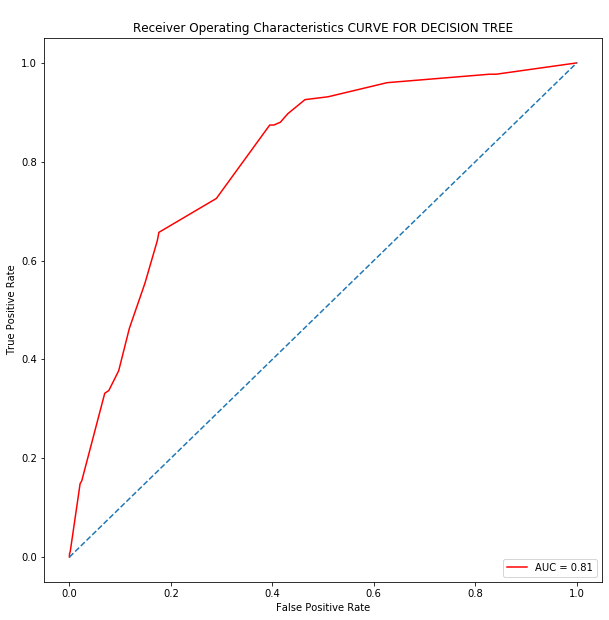

In [72]:
auc_roc,roc_auc,false_positive_rate, true_positive_rate = curve(y_test,y_pred,y_prob)
print("\nArea Under the Receiver Operating Characteristics:",auc_roc)
curve_plot("\nReceiver Operating Characteristics CURVE FOR DECISION TREE" ,roc_auc,false_positive_rate, true_positive_rate)

# hyperparameter tuning for binary classification

fold-validation from 5 to 10 is done to choose suitable values of parameters including criteria, max-depth and min sample leaf
and accuracy for each one of them is calculated. most of them suggest "gini" as criteria and the parameter values become constant after 8-folds.

results obtained are:
criteria - gini
max-depth - 6
min sample leaf - 2

this gives model accuracy of 80.0756 which is improved than the previous obtained accuracy score of78.43 from gini and 79.82 from entropy.

In [73]:
dtree_grid_search(X_train, y_train,5)
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train,4,4)
print( "Accuracy of decision tree using gini index(binary classification) is: ", acc_score(y_test,y_pred))


Accuracy of decision tree using gini index(binary classification) is:  79.8234552332913


In [74]:
dtree_grid_search(X_train, y_train,6)
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train,4,3)
print( "Accuracy of decision tree using gini index(binary classification) is: ", acc_score(y_test,y_pred))


Accuracy of decision tree using gini index(binary classification) is:  79.8234552332913


In [75]:
dtree_grid_search(X_train, y_train,7)
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train,6,2)
print( "Accuracy of decision tree using gini index(binary classification) is: ", acc_score(y_test,y_pred))


Accuracy of decision tree using gini index(binary classification) is:  80.07566204287517


In [76]:
dtree_grid_search(X_train, y_train,8)
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train,3,2)
print( "Accuracy of decision tree using gini index(binary classification) is: ", acc_score(y_test,y_pred))


Accuracy of decision tree using gini index(binary classification) is:  78.31021437578815


In [77]:
dtree_grid_search(X_train, y_train,9)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}

In [78]:
dtree_grid_search(X_train, y_train,10)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2}

# data exploration and preprocessing for multi-class classification

ADDING NEW COLUMN LEVEL(quality <=4 - level 3,quality between (4,6] - level 2 , otherwise level 1) FOR MULTI-CLASS CLASSIFICATION

In [79]:
process_multi(df,df.quality) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend,level
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,2
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False,2


FREQUENCY OF EACH QUALITY LEVEL(level - target variable )

In [80]:
data3_df = frequency(df,df.level,"Quality Level")
data3_df

,Quality Level,Frequency
0,1,825
1,2,2963
2,3,173


BAR CHART SHOWING QUALITY LEVEL DISTRIBUTION

from the plot below we see that for 3-class classification the data is imbalanced.no. of sample in quality level 2 are very high and in quality level 3 are very low.

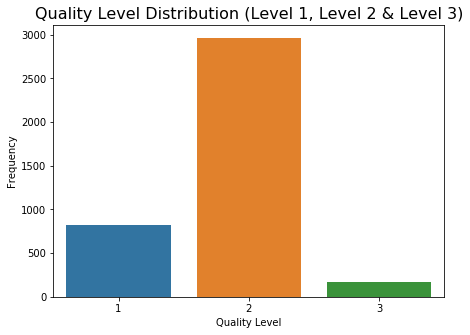

In [81]:
graph(data3_df,"Quality Level","Frequency","Quality Level Distribution (Level 1, Level 2 & Level 3)")

# modelling for multi-class classification
initally the parameters are choosen randomly.
max-depth(the length of the longest path from the tree root to a leaf) is 5.
minimum sample leaf(minimum number of samples required to be at a leaf node) is 2.

SPLITTING IN TRANING AND TESTING SET(20%-testing set)we apply that model on new unseen data, called Test Data, and measure the performance. thus we can be sure that our model is stable or not over fitted on training data. But since we won’t have access to new wine data, we’ll split our dataset into training and testing data on a 80:20 ratio that is considered as most ideal split.

In [82]:
y2=df[target2].values.ravel()
X_train, X_test, y_train, y_test = data_split( x, y2,0.20)


decision tree classification using gini index criteria for feature importance selection and its evaluation
result obtained are same as binary classification with gini index.


In [83]:
y_pred,y_prob = tree_model_gini(X_test,X_train,y_train,5,2)
print( "Accuracy of decision tree using gini index(multi classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using gini index(multi classification) is:  75.28373266078184

classification report:               precision    recall  f1-score   support

           1       0.63      0.21      0.31       175
           2       0.77      0.96      0.85       583
           3       0.00      0.00      0.00        35

    accuracy                           0.75       793
   macro avg       0.47      0.39      0.39       793
weighted avg       0.70      0.75      0.70       793


confusion matrix: [[ 36 138   1]
 [ 20 561   2]
 [  1  34   0]]


decision tree classification using entropy criteria for feature importance selection and its evaluation
result obtained are same as binary classification with entropy.


In [84]:
y_pred,y_prob = tree_model_entropy(X_test,X_train,y_train,5,2)
print( "Accuracy of decision tree using entropy(multi classification) is: ", acc_score(y_test,y_pred))
print ("\nclassification report:" , report(y_test,y_pred))
print ("\nconfusion matrix:",matrix(y_test,y_pred))

Accuracy of decision tree using entropy(multi classification) is:  74.6532156368222

classification report:               precision    recall  f1-score   support

           1       0.61      0.17      0.27       175
           2       0.76      0.96      0.85       583
           3       0.22      0.06      0.09        35

    accuracy                           0.75       793
   macro avg       0.53      0.40      0.40       793
weighted avg       0.71      0.75      0.69       793


confusion matrix: [[ 30 144   1]
 [ 17 560   6]
 [  2  31   2]]


# conclusions with decision tree classifier

1-the given dataset favours the binary classification after hyper-parameter tuning and gives accuracy of 80.075% which is quite great.

2-with multi-class classification the results obtained without hyper-parameter tuning is same as the binary classification.
the possible reason is data imbalance. the no. of samples in class-3 is very low and thus it works same as binary classification.

3-the possible recommended steps is sampling of data to deal with data imbalance and then try multi-class classification.

4-other suitable model could be find by extending to regression tasks.

5-outlier detection algorithms such as K-nearest neighbour should be considered.